In [2]:
import numpy as np
import pandas as pd

In [2]:
# import the excel file with colnames ['run_date', 'entry'] and sheetname 'After 1st round'
df = pd.read_excel('journal_comparison_Oct_backtest.xlsx', sheet_name='After 1st round', header=0)
df.columns = ['run_date', 'entry']
df

,run_date,entry
0,2024.02.27 05:15:06.437,"2023.10.16 00:00:00 min_impulse_psar EURUSD,M..."
1,2024.02.27 05:15:09.807,"2023.10.16 00:15:00 min_impulse_psar EURUSD,M..."
2,2024.02.27 05:15:09.807,"2023.10.16 00:15:00 min_impulse_psar EURUSD,M..."
3,2024.02.27 05:15:09.807,"2023.10.16 00:15:00 min_impulse_psar EURUSD,M..."
4,2024.02.27 05:15:09.807,"2023.10.16 00:15:00 min_impulse_psar EURUSD,M..."
...,...,...
13010,2024.02.27 05:15:45.427,"2023.11.09 23:45:00 min_impulse_psar EURUSD,M..."
13011,2024.02.27 05:15:45.427,"2023.11.09 23:45:00 min_impulse_psar EURUSD,M..."
13012,2024.02.27 05:15:45.427,"2023.11.09 23:45:00 min_impulse_psar EURUSD,M..."
13013,2024.02.27 05:15:45.427,2023.11.09 23:59:47 Tester: order #60 is closed


In [3]:
df_drop = df.drop('run_date', axis=1)
df_drop

,entry
0,"2023.10.16 00:00:00 min_impulse_psar EURUSD,M..."
1,"2023.10.16 00:15:00 min_impulse_psar EURUSD,M..."
2,"2023.10.16 00:15:00 min_impulse_psar EURUSD,M..."
3,"2023.10.16 00:15:00 min_impulse_psar EURUSD,M..."
4,"2023.10.16 00:15:00 min_impulse_psar EURUSD,M..."
...,...
13010,"2023.11.09 23:45:00 min_impulse_psar EURUSD,M..."
13011,"2023.11.09 23:45:00 min_impulse_psar EURUSD,M..."
13012,"2023.11.09 23:45:00 min_impulse_psar EURUSD,M..."
13013,2023.11.09 23:59:47 Tester: order #60 is closed


In [4]:
# pull out the datetime from the string
df_drop['datetime'] = df_drop['entry'].str.extract(r'(\d{4}.\d{2}.\d{2} \d{2}:\d{2}:\d{2})')
# remove the datetime from the string
df_drop['entry'] = df_drop['entry'].str.split('min_impulse_psar EURUSD,M15:').str[1]
df_drop

,entry,datetime
0,New Account Equity at Reset: 100000.0,2023.10.16 00:00:00
1,Entering into OnBar,2023.10.16 00:15:00
2,Checking for news,2023.10.16 00:15:00
3,Time: 0,2023.10.16 00:15:00
4,No Trades Allowed,2023.10.16 00:15:00
...,...,...
13010,SMI: -44.36428143293188,2023.11.09 23:45:00
13011,NO TRADE,2023.11.09 23:45:00
13012,First Cross: true,2023.11.09 23:45:00
13013,NaN,2023.11.09 23:59:47


In [5]:
# remove any rows with NaN
df_drop = df_drop.dropna()
# filter entry to where the beginning of the string includes "Closing"
df_closing = df_drop[df_drop['entry'].str.contains('Closing')]
# reverse the order of the datetime and entry columns
df_closing = df_closing.loc[:, ['datetime', 'entry']]
# # remove the ":00" from the datetime
# df_closing['datetime'] = df_closing['datetime'].str.replace(':00', '')
# # if there is no colon, add ":00" to the datetime
# df_closing['datetime'] = df_closing['datetime'].apply(lambda x: x if ':' in x else x + ':00')
df_closing

,datetime,entry
402,2023.10.16 12:45:00,Closing Buy Ticket: 3 bar rule Ticket #: 1
525,2023.10.16 17:30:00,Closing Sell Ticket: SMI crossing above -40 T...
567,2023.10.16 19:00:00,Closing Buy Ticket: SMI crossing below 40 Tic...
1082,2023.10.17 12:15:00,Closing Sell Ticket: SMI crossing above -40 T...
1357,2023.10.17 22:15:00,Closing Sell Ticket: SMI crossing above -40 T...
1788,2023.10.18 11:45:00,Closing Sell Ticket: Impulse flip Ticket #: 7
1872,2023.10.18 14:45:00,Closing Sell Ticket: 3 bar rule Ticket #: 9
2106,2023.10.19 00:00:00,Closing Sell Ticket: SMI crossing above -40 T...
2648,2023.10.19 17:30:00,Closing Buy Ticket: PSAR flip Ticket #: 12
3271,2023.10.20 15:00:00,Closing Buy Ticket: SMI crossing below 40 Tic...


In [6]:
# convert the datetime to a datetime object
df_closing['datetime'] = pd.to_datetime(df_closing['datetime'], format='%Y.%m.%d %H:%M:%S')
# subtract 7 hrs from the datetime
# df_closing['datetime_EST'] = pd.to_datetime(df_closing['datetime'], format='%Y.%m.%d %H:%M') - pd.Timedelta(hours=7)
df_closing

,datetime,entry
402,2023-10-16 12:45:00,Closing Buy Ticket: 3 bar rule Ticket #: 1
525,2023-10-16 17:30:00,Closing Sell Ticket: SMI crossing above -40 T...
567,2023-10-16 19:00:00,Closing Buy Ticket: SMI crossing below 40 Tic...
1082,2023-10-17 12:15:00,Closing Sell Ticket: SMI crossing above -40 T...
1357,2023-10-17 22:15:00,Closing Sell Ticket: SMI crossing above -40 T...
1788,2023-10-18 11:45:00,Closing Sell Ticket: Impulse flip Ticket #: 7
1872,2023-10-18 14:45:00,Closing Sell Ticket: 3 bar rule Ticket #: 9
2106,2023-10-19 00:00:00,Closing Sell Ticket: SMI crossing above -40 T...
2648,2023-10-19 17:30:00,Closing Buy Ticket: PSAR flip Ticket #: 12
3271,2023-10-20 15:00:00,Closing Buy Ticket: SMI crossing below 40 Tic...


In [7]:
# bring in the other csv file
time_df = pd.read_excel('time.xlsx', sheet_name='After 1st round')
# convert the time column to a datetime object
time_df['Time_EST'] = pd.to_datetime(time_df['Time'], format='%Y.%m.%d %H:%M') - pd.Timedelta(hours=7)
time_df['Time'] = pd.to_datetime(time_df['Time'], format='%Y.%m.%d %H:%M')
cols = time_df.columns.tolist()
# make Time_EST the 2nd column
cols = cols[-1:] + cols[:-1]
time_df = time_df.loc[:, cols]
time_df

,Time_EST,Time,action,Order,lot size,Price,S/L,TP,Profit,Balance
0,2023-10-16 04:45:00,2023-10-16 11:45:00,buy,1,7,1.05364,1.05254,0,0.0,100000.00
1,2023-10-16 05:00:00,2023-10-16 12:00:00,modify,1,7,1.05364,1.05294,0,0.0,100000.00
2,2023-10-16 05:45:00,2023-10-16 12:45:00,close,1,7,1.05377,1.05294,0,91.0,100091.00
3,2023-10-16 10:00:00,2023-10-16 17:00:00,sell,2,7,1.05298,1.05408,0,0.0,100091.00
4,2023-10-16 10:30:00,2023-10-16 17:30:00,close,2,7,1.05395,1.05408,0,-679.0,99412.00
...,...,...,...,...,...,...,...,...,...,...
198,2023-11-09 09:45:00,2023-11-09 16:45:00,modify,59,7,1.07076,1.06976,0,0.0,107160.84
199,2023-11-09 10:00:00,2023-11-09 17:00:00,modify,59,7,1.07076,1.07133,0,0.0,107160.84
200,2023-11-09 10:02:00,2023-11-09 17:02:00,s/l,59,7,1.07133,1.07133,0,399.0,107559.84
201,2023-11-09 16:00:00,2023-11-09 23:00:00,sell,60,7,1.06638,1.06748,0,0.0,107559.84


In [8]:
# join the two dataframes on the datetime
df_joined = time_df.set_index('Time').join(df_closing.set_index('datetime'), how='left')
# fill in the 'entry' column with "stoploss" if 's/l' is in the 'action' column
df_joined['entry'] = np.where(df_joined['action'].str.contains('s/l'), 'stoploss', df_joined['entry'])
# reset the index and rename it to 'datetime'
df_reindex = df_joined.reset_index().rename(columns={'index': 'datetime'})
df_reindex

,Time,Time_EST,action,Order,lot size,Price,S/L,TP,Profit,Balance,entry
0,2023-10-16 11:45:00,2023-10-16 04:45:00,buy,1,7,1.05364,1.05254,0,0.0,100000.00,NaN
1,2023-10-16 12:00:00,2023-10-16 05:00:00,modify,1,7,1.05364,1.05294,0,0.0,100000.00,NaN
2,2023-10-16 12:45:00,2023-10-16 05:45:00,close,1,7,1.05377,1.05294,0,91.0,100091.00,Closing Buy Ticket: 3 bar rule Ticket #: 1
3,2023-10-16 17:00:00,2023-10-16 10:00:00,sell,2,7,1.05298,1.05408,0,0.0,100091.00,NaN
4,2023-10-16 17:30:00,2023-10-16 10:30:00,close,2,7,1.05395,1.05408,0,-679.0,99412.00,Closing Sell Ticket: SMI crossing above -40 T...
...,...,...,...,...,...,...,...,...,...,...,...
198,2023-11-09 16:45:00,2023-11-09 09:45:00,modify,59,7,1.07076,1.06976,0,0.0,107160.84,NaN
199,2023-11-09 17:00:00,2023-11-09 10:00:00,modify,59,7,1.07076,1.07133,0,0.0,107160.84,NaN
200,2023-11-09 17:02:00,2023-11-09 10:02:00,s/l,59,7,1.07133,1.07133,0,399.0,107559.84,stoploss
201,2023-11-09 23:00:00,2023-11-09 16:00:00,sell,60,7,1.06638,1.06748,0,0.0,107559.84,NaN


In [9]:
# save df_closing to a csv file
# df_reindex.to_csv('journal_comparison_Oct_backtest_closing_after_1st_round.csv', index=False)

In [10]:
comparison_file = pd.read_excel('Optimization Results.xlsx', sheet_name='Comparison to backtest')
# drop all columns to the right of 'Drawdown'
comparison_file = comparison_file.loc[:, :'Drawdown']
comparison_file

,datetime,Time_EST,action,Reason for difference,Order,lot size,Price,S/L,TP,Profit,Balance,entry,profit,Drawdown
0,2023-10-16 11:45:00,2023-10-16 04:45:00,buy,NaN,1,7,1.05364,1.05254,0,0.0,100000.0,NaN,0.0,0.0
1,2023-10-16 12:00:00,2023-10-16 05:00:00,modify,NaN,1,7,1.05364,1.05294,0,0.0,100000.0,NaN,0.0,0.0
2,2023-10-16 12:45:00,2023-10-16 05:45:00,close,in backtesting as well,1,7,1.05377,1.05294,0,91.0,100091.0,Closing Buy Ticket: 3 bar rule Ticket #: 1,91.0,0.0
3,2023-10-16 13:30:00,2023-10-16 06:30:00,buy,NaN,2,7,1.05311,1.05201,0,0.0,100091.0,NaN,0.0,0.0
4,2023-10-16 13:45:00,2023-10-16 06:45:00,modify,NaN,2,7,1.05311,1.05230,0,0.0,100091.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2023-11-09 17:02:00,2023-11-09 10:02:00,s/l,entered earlier on backtest because of impulse...,99,7,1.07133,1.07133,0,399.0,102689.6,stoploss,399.0,0.0
326,2023-11-09 17:45:00,2023-11-09 10:45:00,buy,NaN,100,7,1.07152,1.07042,0,0.0,102689.6,NaN,0.0,0.0
327,2023-11-09 18:15:00,2023-11-09 11:15:00,close,didn't exit in backtest until 11:18 so this wa...,100,7,1.07113,1.07042,0,-273.0,102416.6,Closing Buy Ticket: SMI crossing below 40 Tick...,0.0,-273.0
328,2023-11-09 23:00:00,2023-11-09 16:00:00,sell,really late to be entering a trade,101,7,1.06638,1.06748,0,0.0,102416.6,NaN,0.0,0.0


In [11]:
# select just the reason for difference and the datetime columns in the comparison_file
comparison_file_left = comparison_file.loc[:, ['datetime', 'Reason for difference']]
# add a column to df_reindex that is just True
df_reindex['Also in new'] = True
reindex_right = df_reindex.loc[:, ['Time', 'Also in new']]
# join df_reindex with comparison_file on the datetime to get just the 'reason for difference' column
df_joined_comparison = df_reindex.set_index('Time').join(comparison_file_left.set_index('datetime'), how='left')
df_joined_comparison_opp = reindex_right.set_index('Time').join(comparison_file.set_index('datetime'), how='right')
df_joined_comparison

,Time_EST,action,Order,lot size,Price,S/L,TP,Profit,Balance,entry,Also in new,Reason for difference
2023-10-16 11:45:00,2023-10-16 04:45:00,buy,1,7,1.05364,1.05254,0,0.0,100000.00,NaN,True,NaN
2023-10-16 12:00:00,2023-10-16 05:00:00,modify,1,7,1.05364,1.05294,0,0.0,100000.00,NaN,True,NaN
2023-10-16 12:45:00,2023-10-16 05:45:00,close,1,7,1.05377,1.05294,0,91.0,100091.00,Closing Buy Ticket: 3 bar rule Ticket #: 1,True,in backtesting as well
2023-10-16 17:00:00,2023-10-16 10:00:00,sell,2,7,1.05298,1.05408,0,0.0,100091.00,NaN,True,NaN
2023-10-16 17:30:00,2023-10-16 10:30:00,close,2,7,1.05395,1.05408,0,-679.0,99412.00,Closing Sell Ticket: SMI crossing above -40 T...,True,SMI started going the opposite direction
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-09 16:45:00,2023-11-09 09:45:00,modify,59,7,1.07076,1.06976,0,0.0,107160.84,NaN,True,NaN
2023-11-09 17:00:00,2023-11-09 10:00:00,modify,59,7,1.07076,1.07133,0,0.0,107160.84,NaN,True,NaN
2023-11-09 17:02:00,2023-11-09 10:02:00,s/l,59,7,1.07133,1.07133,0,399.0,107559.84,stoploss,True,entered earlier on backtest because of impulse...
2023-11-09 23:00:00,2023-11-09 16:00:00,sell,60,7,1.06638,1.06748,0,0.0,107559.84,NaN,True,really late to be entering a trade


In [12]:
# df_joined_comparison.to_csv('journal_comparison_Oct_backtest_closing_with_reasons.csv', index=False)
# df_joined_comparison_opp.to_csv('journal_comparison_Oct_backtest_closing_with_reasons_opp.csv', index=True)

In [13]:
# filter to just the rows where the action column is 'close' or 's/l'
trade_exits = df_joined_comparison[df_joined_comparison['action'].isin(['close', 's/l'])]
# just show the columns Time_EST, action, Profit, entry, and Reason for difference
trade_exits_sel = trade_exits.loc[:, ['Time_EST', 'action', 'Profit', 'entry', 'Reason for difference']]
trade_exits_sel

,Time_EST,action,Profit,entry,Reason for difference
2023-10-16 12:45:00,2023-10-16 05:45:00,close,91.00,Closing Buy Ticket: 3 bar rule Ticket #: 1,in backtesting as well
2023-10-16 17:30:00,2023-10-16 10:30:00,close,-679.00,Closing Sell Ticket: SMI crossing above -40 T...,SMI started going the opposite direction
2023-10-16 19:00:00,2023-10-16 12:00:00,close,-84.00,Closing Buy Ticket: SMI crossing below 40 Tic...,In backtesting I used the rule that you had to...
2023-10-17 12:15:00,2023-10-17 05:15:00,close,-651.00,Closing Sell Ticket: SMI crossing above -40 T...,should have been included in backtest
2023-10-17 19:48:00,2023-10-17 12:48:00,s/l,70.00,stoploss,"this was negative in my backtest, the trailin..."
2023-10-17 22:15:00,2023-10-17 15:15:00,close,-588.00,Closing Sell Ticket: SMI crossing above -40 T...,In backtesting I used the rule that you had to...
2023-10-18 11:45:00,2023-10-18 04:45:00,close,-644.00,Closing Sell Ticket: Impulse flip Ticket #: 7,In backtesting I used the rule that you had to...
2023-10-18 12:46:00,2023-10-18 05:46:00,s/l,-770.00,stoploss,Impulse MACD was different...
2023-10-18 14:45:00,2023-10-18 07:45:00,close,469.00,Closing Sell Ticket: 3 bar rule Ticket #: 9,"basically the same, except I closed a little d..."
2023-10-18 19:48:00,2023-10-18 12:48:00,s/l,1225.00,stoploss,exactly the same


In [ ]:
# find the win rate for trade_exits
overall_win_rate = trade_exits.loc[trade_exits['Profit'] > 0].shape[0] / trade_exits.shape[0]
# create a column that contains the hour of the day from the Time_EST column
trade_exits['hour'] = trade_exits['Time_EST'].dt.hour

In [21]:
# find the win rate for each hour of the day
hourly_win_rate = trade_exits.groupby('hour')['Profit'].apply(lambda x: (x > 0).sum() / x.shape[0])
# convert hourly_win_rate to a dataframe
hourly_win_rate_df = pd.DataFrame(hourly_win_rate)
# rename the column to 'win rate'
hourly_win_rate_df.columns = ['win rate']
# add a column that contains the number of trades for each hour of the day
hourly_win_rate_df['num trades'] = trade_exits.groupby('hour')['Profit'].count()
# add a column that contains the average positive profit for each hour of the day
hourly_win_rate_df['avg pos profit'] = trade_exits.groupby('hour')['Profit'].apply(lambda x: x[x > 0].mean())
# add a column that contains the average negative profit for each hour of the day
hourly_win_rate_df['avg neg profit'] = trade_exits.groupby('hour')['Profit'].apply(lambda x: x[x < 0].mean())
hourly_win_rate_df

,win rate,num trades,avg pos profit,avg neg profit
hour,,,,
4,0.000000,5,NaN,-469.000000
5,0.500000,6,445.666667,-525.000000
6,1.000000,2,490.000000,NaN
7,0.500000,6,814.333333,-548.333333
8,1.000000,3,2002.000000,NaN
9,0.250000,8,133.000000,-526.166667
10,0.600000,5,1019.666667,-493.500000
11,0.000000,2,NaN,-283.500000
12,0.555556,9,1164.800000,-486.500000


In [44]:
# get the data from excel
df_2023_trades = pd.read_excel('Optimization Results.xlsx', sheet_name='2023_full_year', header=0)  
df_2023_trades['Datetime'] = pd.to_datetime(df_2023_trades['Datetime'], format='%Y.%m.%d %H:%M')
df_2023_trades

,Datetime,action,Order,lot size,Price,S/L,TP,Profit,Balance
0,2023-01-02 14:30:00,sell,1,2.0,1.06839,1.06949,0,0.0,200000.0
1,2023-01-02 15:45:00,close,1,2.0,1.06841,1.06949,0,-4.0,199996.0
2,2023-01-03 11:00:00,sell,2,4.0,1.05520,1.05630,0,0.0,199996.0
3,2023-01-03 13:15:00,modify,2,4.0,1.05520,1.05388,0,0.0,199996.0
4,2023-01-03 13:30:00,modify,2,4.0,1.05520,1.05377,0,0.0,199996.0
...,...,...,...,...,...,...,...,...,...
1240,2023-12-29 16:00:00,sell,397,4.0,1.10487,1.10597,0,0.0,201949.5
1241,2023-12-29 16:33:00,s/l,397,4.0,1.10597,1.10597,0,-440.0,201509.5
1242,2023-12-29 17:15:00,buy,398,4.0,1.10741,1.10631,0,0.0,201509.5
1243,2023-12-29 17:30:00,modify,398,4.0,1.10741,1.10638,0,0.0,201509.5


In [45]:
df_2023_journal = pd.read_excel('Optimization Results.xlsx', sheet_name='2023_journal', header=0)
# pull out the datetime from the string
df_2023_journal['Datetime'] = df_2023_journal['entry'].str.extract(r'(\d{4}.\d{2}.\d{2} \d{2}:\d{2}:\d{2})')
df_2023_journal['Datetime'] = pd.to_datetime(df_2023_journal['Datetime'], format='%Y.%m.%d %H:%M:%S')
# remove the datetime from the string
df_2023_journal['entry'] = df_2023_journal['entry'].str.split('min_impulse_psar EURUSD,M15:').str[1]
# reverse the order of the datetime and entry columns
df_2023_journal = df_2023_journal.loc[:, ['Datetime', 'entry']]
df_2023_journal

,Datetime,entry
0,2023-01-02 15:45:00,Closing Sell Ticket: 3 bar rule Ticket #: 1
1,2023-01-10 13:30:00,Closing Sell Ticket: SMI crossing above -40 T...
2,2023-01-11 15:00:00,Closing Sell Ticket: SMI crossing above -40 T...
3,2023-01-12 11:15:00,Closing Sell Ticket: SMI crossing above -40 T...
4,2023-01-17 11:45:00,Closing Buy Ticket: PSAR flip Ticket #: 20
...,...,...
195,2023-12-27 13:15:00,Closing Buy Ticket: 3 bar rule Ticket #: 389
196,2023-12-27 19:00:00,Closing Buy Ticket: 3 bar rule Ticket #: 390
197,2023-12-28 12:45:00,Closing Buy Ticket: SMI crossing below 40 Tic...
198,2023-12-28 20:00:00,Closing Sell Ticket: 3 bar rule Ticket #: 394


In [46]:
# join the two dataframes on the datetime
df_2023_joined = df_2023_trades.set_index('Datetime').join(df_2023_journal.set_index('Datetime'), how='left')
# fill in the 'entry' column with "stoploss" if 's/l' is in the 'action' column
df_2023_joined['entry'] = np.where(df_2023_joined['action'].str.contains('s/l'), 'stoploss', df_2023_joined['entry'])
df_2023_joined

,action,Order,lot size,Price,S/L,TP,Profit,Balance,entry
Datetime,,,,,,,,,
2023-01-02 14:30:00,sell,1,2.0,1.06839,1.06949,0,0.0,200000.0,NaN
2023-01-02 15:45:00,close,1,2.0,1.06841,1.06949,0,-4.0,199996.0,Closing Sell Ticket: 3 bar rule Ticket #: 1
2023-01-03 11:00:00,sell,2,4.0,1.05520,1.05630,0,0.0,199996.0,NaN
2023-01-03 13:15:00,modify,2,4.0,1.05520,1.05388,0,0.0,199996.0,NaN
2023-01-03 13:30:00,modify,2,4.0,1.05520,1.05377,0,0.0,199996.0,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-29 16:00:00,sell,397,4.0,1.10487,1.10597,0,0.0,201949.5,NaN
2023-12-29 16:33:00,s/l,397,4.0,1.10597,1.10597,0,-440.0,201509.5,stoploss
2023-12-29 17:15:00,buy,398,4.0,1.10741,1.10631,0,0.0,201509.5,NaN


In [47]:
df_2023_joined_reindex = df_2023_joined.reset_index()
# remove any rows that contain 'modify' in the 'action' column
df_2023_joined_closing = df_2023_joined_reindex[df_2023_joined_reindex['action'].str.contains('s/l|close')]
df_2023_joined_opening = df_2023_joined_reindex[df_2023_joined_reindex['action'].str.contains('buy|sell')]
# rename df_2023_joined_opening 'Datetime' to 'Open Time'
df_2023_joined_opening = df_2023_joined_opening.rename(columns={'Datetime': 'Open Time'})
# select only the Open Time and Order columns
df_2023_joined_opening_sel = df_2023_joined_opening.loc[:, ['Open Time', 'Order']]
# rename df_2023_joined_closing 'Datetime' to 'Close Time'
df_2023_joined_closing = df_2023_joined_closing.rename(columns={'Datetime': 'Close Time'})
# merge the two dataframes on the 'Order' column
df_2023_joined2_closing = df_2023_joined_closing.merge(df_2023_joined_opening_sel, on='Order', how='left')
# reorder the columns so that 'Open Time' is next to 'Close Time'
df_2023_joined2_closing = df_2023_joined2_closing.loc[:, ['Open Time', 'Close Time', 'action','Order', 'Profit', 'entry']]



In [48]:
# find the win rate for df_2023_joined_closing
overall_win_rate = df_2023_joined2_closing.loc[df_2023_joined2_closing['Profit'] > 0].shape[0] / df_2023_joined2_closing.shape[0]
# create a column that contains the hour of the day from the Time_EST column
df_2023_joined2_closing['hour'] = df_2023_joined2_closing['Open Time'].dt.hour
overall_win_rate

0.3592964824120603

In [49]:
# find the win rate for each hour of the day
hourly_win_rate = df_2023_joined2_closing.groupby('hour')['Profit'].apply(lambda x: (x > 0).sum() / x.shape[0])
# convert hourly_win_rate to a dataframe
hourly_win_rate_df = pd.DataFrame(hourly_win_rate)
# rename the column to 'win rate'
hourly_win_rate_df.columns = ['win rate']
# add a column that contains the number of trades for each hour of the day
hourly_win_rate_df['num trades'] = df_2023_joined2_closing.groupby('hour')['Profit'].count()
# add a column that contains the average positive profit for each hour of the day
hourly_win_rate_df['avg pos profit'] = df_2023_joined2_closing.groupby('hour')['Profit'].apply(lambda x: x[x > 0].mean())
# add a column that contains the average negative profit for each hour of the day
hourly_win_rate_df['avg neg profit'] = df_2023_joined2_closing.groupby('hour')['Profit'].apply(lambda x: x[x < 0].mean())
# calculate the profit factor for each hour
hourly_win_rate_df['profit factor'] = df_2023_joined2_closing.groupby('hour')['Profit'].apply(lambda x: x[x > 0].sum()) / abs(df_2023_joined2_closing.groupby('hour')['Profit'].apply(lambda x: x[x < 0].sum()))
hourly_win_rate_df

,win rate,num trades,avg pos profit,avg neg profit,profit factor
hour,,,,,
11,0.380165,121,441.468261,-273.632533,0.989529
12,0.230769,26,859.333333,-300.000000,0.859333
13,0.444444,36,412.440000,-265.905000,1.240864
14,0.296296,27,425.000000,-243.368421,0.735294
15,0.416667,60,812.480000,-323.614286,1.793317
16,0.288462,52,451.466667,-343.351351,0.533060
17,0.348837,43,697.866667,-321.714286,1.162078
18,0.363636,33,262.496667,-264.952381,0.566132


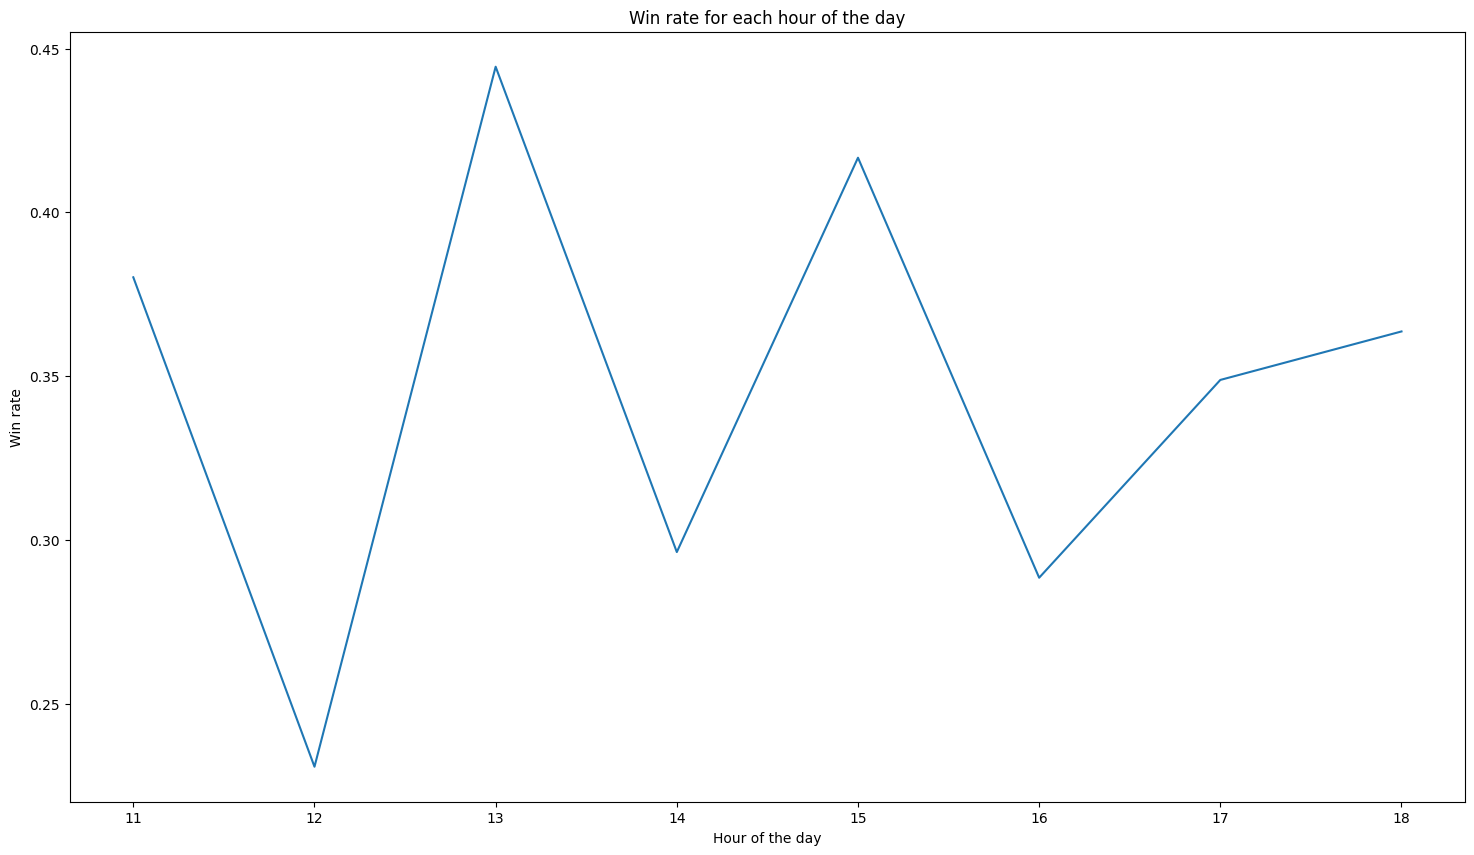

In [50]:
# graph the win rate for each hour of the day
import matplotlib.pyplot as plt
plt.plot(hourly_win_rate_df['win rate'])
plt.xlabel('Hour of the day')
plt.ylabel('Win rate')
plt.title('Win rate for each hour of the day')
# increase the size of the graph
plt.rcParams['figure.figsize'] = [18, 10]
plt.show()
